In [74]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

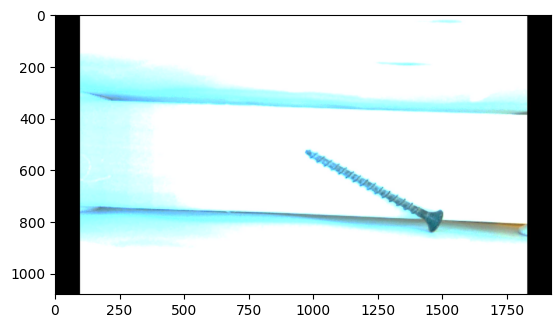

In [99]:
image = cv2.imread('0.png')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

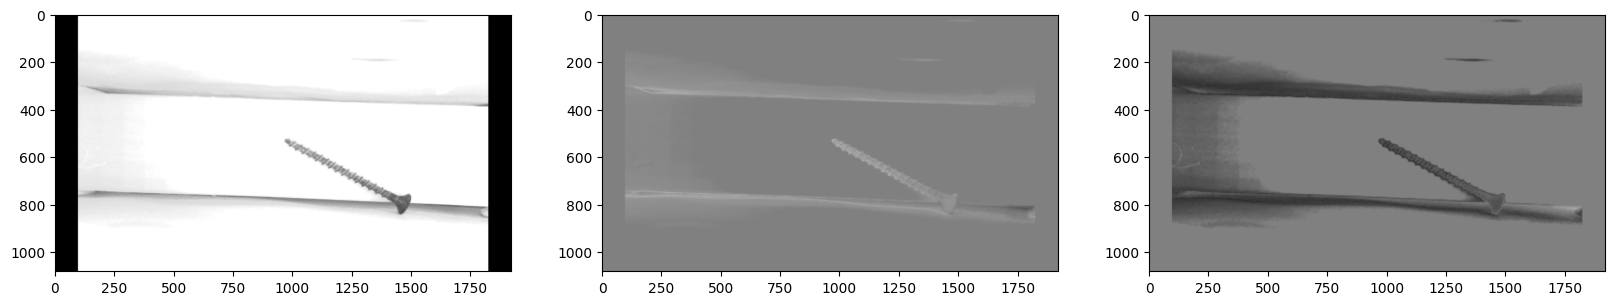

In [100]:
yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
# yuv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
y, u, v = cv2.split(yuv)

plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.imshow(y, cmap='gray', vmin=0, vmax=255)
plt.subplot(132)
plt.imshow(u, cmap='gray', vmin=0, vmax=255)
plt.subplot(133)
plt.imshow(v, cmap='gray', vmin=0, vmax=255)


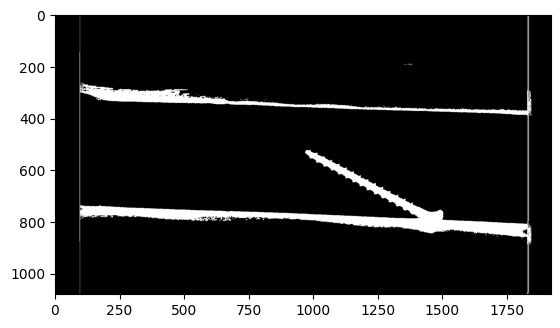

In [101]:
lower_brass = np.array([1, 0, 0])
upper_brass = np.array([220, 255, 200])
mask = cv2.inRange(yuv, lower_brass, upper_brass)

plt.imshow(mask, cmap='gray', vmin=0, vmax=255)

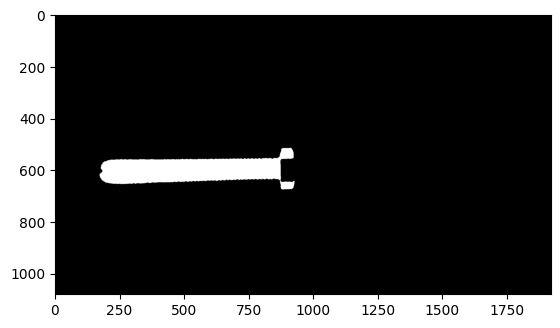

In [97]:
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

black = np.zeros_like(mask)
# get largest contour
max_contour = max(contours, key=cv2.contourArea)
cv2.drawContours(black, [max_contour], -1, (255, 255, 255), -1)

plt.imshow(cv2.cvtColor(black, cv2.COLOR_BGR2RGB))

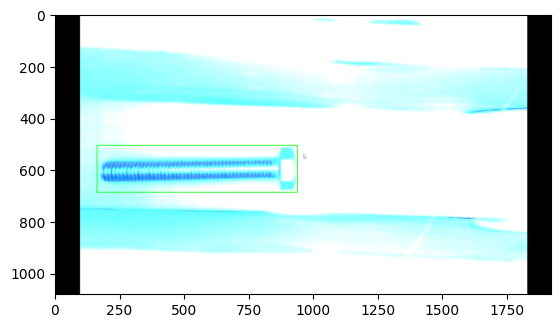

In [98]:
hull_image = image.copy()
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
max_contour = max(contours, key=cv2.contourArea)

rect = cv2.boundingRect(max_contour)

# Draw the convex hull
x,y,w,h = rect
padding = 10
x -= padding
y -= padding
w += padding * 2
h += padding * 2
cv2.rectangle(hull_image,(x,y),(x+w,y+h),(0,255,0),2)

plt.imshow(cv2.cvtColor(hull_image, cv2.COLOR_BGR2RGB))